# Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import os

#Visualising Tools

import seaborn as sns
import matplotlib.pyplot as plt

# Words tools
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import one_hot

# LSTM tools 
from keras.models import Sequential
from keras.layers import Embedding,Conv1D,LSTM,Dense,Activation,Dropout
# GRU-Model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay

# Loading the Datasets

### Loading the Fake Tweets Dataset

In [2]:
Df_Fake_Tweets=pd.read_csv('Fake_Tweets.csv')

In [3]:
Df_Fake_Tweets.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Loading the True Tweets Dataset

In [4]:
Df_True_Tweets=pd.read_csv('True_Tweets.csv')

In [5]:
Df_True_Tweets.head(5)

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,WASHINGTON (Reuters) - Transgender people will...
2,WASHINGTON (Reuters) - The special counsel inv...
3,WASHINGTON (Reuters) - Trump campaign adviser ...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [6]:
Df_True_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29761 entries, 0 to 29760
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    29761 non-null  object
dtypes: object(1)
memory usage: 232.6+ KB


### Loading the Russian Fake Tweets Dataset

In [7]:
Df_Russian_Fake_Tweets=pd.read_csv('Russian_Fake_Tweets.csv')

In [8]:
Df_Russian_Fake_Tweets.head()

,Unnamed: 0,text
0,0,Ukraine has put itself in a situation when ext...
1,1,Regardless who was behind the recent attack on...
2,2,"Pilsudski is a historical figure, who establis..."
3,3,Washington (and to a large degree Brussels) ar...
4,4,The beneficiary of the resolution of the Europ...


In [9]:
Df_Russian_Fake_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7369 entries, 0 to 7368
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7369 non-null   int64 
 1   text        7366 non-null   object
dtypes: int64(1), object(1)
memory usage: 115.3+ KB


# Organizing & Combining Data Sets

### Dropping Columns 

In [10]:
# Df_Fake_Tweets
Df_Fake_Tweets=Df_Fake_Tweets.drop(columns=['title', 'subject','date'])

In [11]:
Df_Fake_Tweets.head()

,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...


In [12]:
#Df_Russian_Fake_Tweets
Df_Russian_Fake_Tweets=Df_Russian_Fake_Tweets.drop(columns=['Unnamed: 0'])

In [13]:
Df_Russian_Fake_Tweets.head()

,text
0,Ukraine has put itself in a situation when ext...
1,Regardless who was behind the recent attack on...
2,"Pilsudski is a historical figure, who establis..."
3,Washington (and to a large degree Brussels) ar...
4,The beneficiary of the resolution of the Europ...


### Assigning labels to data before combining

In [14]:
Df_Fake_Tweets['Target(Fake)'] = 1
Df_True_Tweets['Target(Fake)'] = 0
Df_Russian_Fake_Tweets['Target(Fake)']=1

In [15]:
Df_Fake_Tweets.head()

,text,Target(Fake)
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [16]:
Df_True_Tweets.head()

,text,Target(Fake)
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [17]:
Df_Russian_Fake_Tweets.head(5)

,text,Target(Fake)
0,Ukraine has put itself in a situation when ext...,1
1,Regardless who was behind the recent attack on...,1
2,"Pilsudski is a historical figure, who establis...",1
3,Washington (and to a large degree Brussels) ar...,1
4,The beneficiary of the resolution of the Europ...,1


### Combining the datasets in one master dataset

In [18]:
Df_master = pd.concat([Df_Fake_Tweets,Df_True_Tweets,Df_Russian_Fake_Tweets])

In [19]:
Df_master.head()

,text,Target(Fake)
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [20]:
Df_master.head()

,text,Target(Fake)
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1



### Shuffling the DataFrame rows

In [21]:
Df_master = Df_master.sample(frac = 1).reset_index(drop=True)

In [22]:
Df_master

,text,Target(Fake)
0,WASHINGTON (Reuters) - The United States on Tu...,0
1,An explosive allegation has come out of Tasnim...,1
2,"New Black Panther Entertainer of The Year, Bey...",1
3,Hillary s been using churches across America a...,1
4,The Queen of the DNC is in big trouble 1000+ B...,1
...,...,...
60606,WASHINGTON (Reuters) - The top U.S. Senate Dem...,0
60607,KUALA LUMPUR (Reuters) - Malaysian Prime Minis...,0
60608,WASHINGTON (Reuters) - U.S. President Barack O...,0
60609,LONDON (Reuters) - Iranian President Hassan Ro...,0


# Exploratory Data Analysis

In [23]:
Df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60611 entries, 0 to 60610
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          60608 non-null  object
 1   Target(Fake)  60611 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 947.2+ KB


### Checking missing values 

In [24]:
Df_master.isna().sum()

text            3
Target(Fake)    0
dtype: int64

### Dropping all missing values

In [25]:
Df_master=Df_master.dropna()

In [26]:
Df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60608 entries, 0 to 60610
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          60608 non-null  object
 1   Target(Fake)  60608 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


### Looking at some fake news

In [27]:
Df_master[Df_master['Target(Fake)']==1].head()

,text,Target(Fake)
1,An explosive allegation has come out of Tasnim...,1
2,"New Black Panther Entertainer of The Year, Bey...",1
3,Hillary s been using churches across America a...,1
4,The Queen of the DNC is in big trouble 1000+ B...,1
8,"By now, all of us know that Trump is a complet...",1


### Looking at some True news

In [28]:
Df_master[Df_master['Target(Fake)']==0].head()

,text,Target(Fake)
0,WASHINGTON (Reuters) - The United States on Tu...,0
5,(Reuters) - U.S. President Donald Trump and Ch...,0
6,WASHINGTON (Reuters) - Republican presidential...,0
7,WASHINGTON (Reuters) - In a big victory for th...,0
9,"@EmilioMorenatti Amazing, heart wrenching phot...",0


### Checking Target Column Distribution

In [29]:
Df_master['Target(Fake)'].value_counts()

1    30847
0    29761
Name: Target(Fake), dtype: int64

#### It looks that the dataset is slightly unbalanced , because Russian_Fake_Tweets dataset was added 

### Visualising the Target Column Distribution 

/Users/kirilsbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target(Fake)', ylabel='count'>

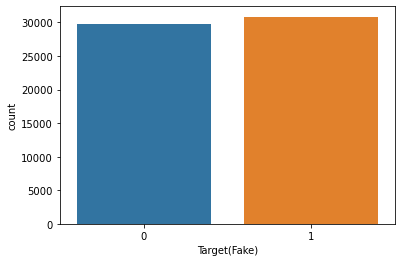

In [30]:
sns.countplot(Df_master['Target(Fake)'])

### Text length Distribution (Fake Tweets & True Tweets)

In [31]:
Df_master['text_length'] = Df_master.text.apply(lambda x: len(x.split()))

/var/folders/h6/8dp078m52pg2874gjjbwd0lc0000gn/T/ipykernel_19042/1461713076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_master['text_length'] = Df_master.text.apply(lambda x: len(x.split()))


In [32]:
Df_master.head()

,text,Target(Fake),text_length
0,WASHINGTON (Reuters) - The United States on Tu...,0,80
1,An explosive allegation has come out of Tasnim...,1,414
2,"New Black Panther Entertainer of The Year, Bey...",1,240
3,Hillary s been using churches across America a...,1,205
4,The Queen of the DNC is in big trouble 1000+ B...,1,32


In [33]:
Fake = Df_master[Df_master['Target(Fake)'] == 1]
Real = Df_master[Df_master['Target(Fake)']== 0]

/Users/kirilsbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kirilsbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


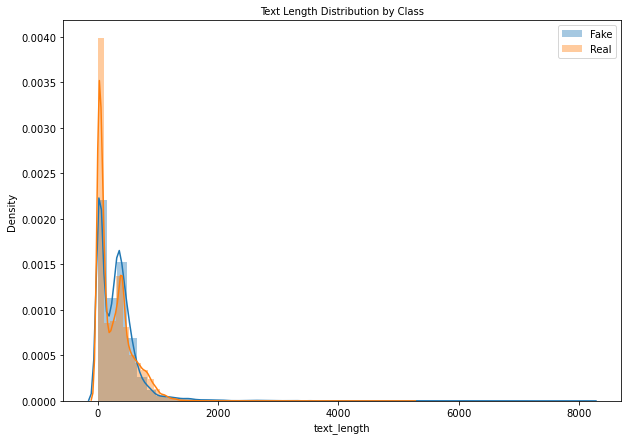

In [34]:
plt.figure(figsize=(10,7))
sns.distplot(Fake.text_length, hist= True, label= 'Fake')
sns.distplot(Real.text_length, hist= True, label= 'Real')
plt.legend()
plt.title('Text Length Distribution by Class', fontsize = 10)
plt.show()

#### It seems that the text length of both categories(Fake Tweets and Real Tweets) are almost equal, as we can see the big majority of tweets have text length between 1 - 1000 symbols.  

### Drooping 'text_length' column

In [35]:
Df_master=Df_master.drop(columns='text_length')

# Data Preparation Process

### Removing RT, Punctuation etc

In [36]:
def delete_punc(x): return re.sub('RT @\w+: ', " ", x)

In [37]:
def dp(x): return re.sub(
    "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x)

### Removing punctuations, tags, and annotations and all texts are converted to lower case to avoid duplication of the same words

In [38]:
Df_master["text"] = Df_master.text.map(delete_punc).map(dp)
Df_master["text"] = Df_master.text.str.lower()

In [39]:
Df_master

,text,Target(Fake)
0,washington reuters the united states on tu...,0
1,an explosive allegation has come out of tasnim...,1
2,new black panther entertainer of the year bey...,1
3,hillary s been using churches across america a...,1
4,the queen of the dnc is in big trouble 1000 b...,1
...,...,...
60606,washington reuters the top u s senate dem...,0
60607,kuala lumpur reuters malaysian prime minis...,0
60608,washington reuters u s president barack o...,0
60609,london reuters iranian president hassan ro...,0


### Removing Tweets -Stop words

In [40]:
stop = stopwords.words('english')
Df_master['text'] = Df_master['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
Df_master.head()

,text,Target(Fake)
0,washington reuters united states tuesday welco...,0
1,explosive allegation come tasnim news republic...,1
2,new black panther entertainer year beyonce sho...,1
3,hillary using churches across america backdrop...,1
4,queen dnc big trouble 1000 berners walked ca g...,1


In [41]:
Df_master = Df_master.copy()
Df_master.text = Df_master.text.str.replace('Reuters', '')

# Developing Models

### Splitting the Data into training and testing data

In [42]:
text_df = Df_master['text']
target_df = Df_master['Target(Fake)']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(text_df,target_df, random_state = 42)

### Checking the splitted data (Training and Testing)

In [44]:
print(f"""
x_train shape: {X_train.shape}, 
y_train shape: {y_train.shape},
X_test shape: {X_test.shape},
y_test shape: {y_test.shape}
""" )


x_train shape: (45456,), 
y_train shape: (45456,),
X_test shape: (15152,),
y_test shape: (15152,)



# Developing Models

### Defines a few hyperparameters

In [45]:
max_words = 4000
max_len = 500

### Creates a tokenizer and first tokenizes the words

In [46]:
token = Tokenizer(num_words=max_words, lower=True, split=' ')
token.fit_on_texts(X_train.values)

### The sequence and padded process

In [47]:
sequences = token.texts_to_sequences(X_train.values)
train_sequences_padded = pad_sequences(sequences, maxlen=max_len)

## LSTM(Long Short Term Memory) Model

### Setting the model parameters 

In [48]:
embed_dim = 50
lstm_out = 64
batch_size = 32

### Building the LSTM(Long Short Term Memory) Model

In [49]:
model_lstm = Sequential()
#
model_lstm.add(Embedding(max_words, embed_dim, input_length = max_len))
#
model_lstm.add(Conv1D(64, 5, activation='relu'))
#
model_lstm.add(LSTM(lstm_out))
#
model_lstm.add(Dense(256))
#
model_lstm.add(Activation('relu'))
#
model_lstm.add(Dropout(0.5))
#
model_lstm.add(Dense(1, name='out_layer'))
#
model_lstm.add(Activation('sigmoid'))
#
model_lstm.compile(loss = 'binary_crossentropy',optimizer='adam', metrics = ['accuracy'])
print(model_lstm.summary())

2022-08-15 10:16:07.885101: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           200000    
                                                                 
 conv1d (Conv1D)             (None, 496, 64)           16064     
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 2

### Training the LSTM Model

In [50]:
history_lstm = model_lstm.fit(train_sequences_padded, y_train, batch_size=batch_size, epochs = 3, validation_split=0.2)

Epoch 1/3
1137/1137 [==============================] - 208s 181ms/step - loss: 0.1282 - accuracy: 0.9505 - val_loss: 0.0487 - val_accuracy: 0.9865
Epoch 2/3
1137/1137 [==============================] - 210s 185ms/step - loss: 0.0467 - accuracy: 0.9875 - val_loss: 0.0308 - val_accuracy: 0.9914
Epoch 3/3
1137/1137 [==============================] - 224s 197ms/step - loss: 0.0419 - accuracy: 0.9891 - val_loss: 0.0340 - val_accuracy: 0.9918


### Evaluating the LSTM Model on test dataset

In [51]:
test_sequences = token.texts_to_sequences(X_test)
test_sequences_padded = pad_sequences(test_sequences, maxlen=max_len)

In [52]:
evaluation_lstm=model_lstm.evaluate(test_sequences_padded, y_test)

474/474 [==============================] - 22s 46ms/step - loss: 0.0337 - accuracy: 0.9924


# Building plots to summarize history of LSTM MODEL trainig process 

In [53]:
print(history_lstm.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### LSTM Model  'Training' and 'Validation' Accuracy

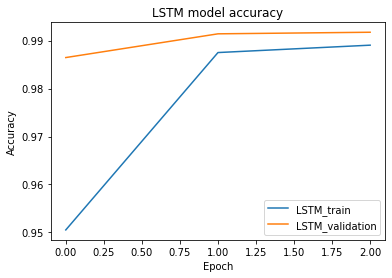

In [54]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM_train', 'LSTM_validation'], loc='lower right')
plt.show()

### LSTM Model  'Training' and 'Validation' Loss

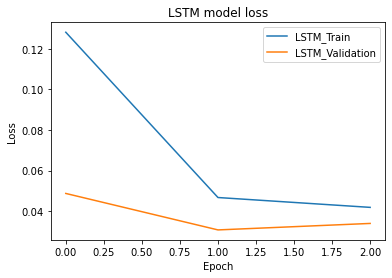

In [55]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['LSTM_Train', 'LSTM_Validation'], loc = 'upper right')

### Saving the Predicted Data for LSTM

In [56]:
pred_data=model_lstm.predict(test_sequences_padded)

In [57]:
pred_data_lstm=pred_data.copy()

### Rounding the data (1 or 0 ) to classify

In [58]:
for data in range (len(pred_data_lstm)):
    pred_data_lstm[data][0] = round (pred_data_lstm[data][0])

### Creating confusion matrix and inserting the predictions and the expected values

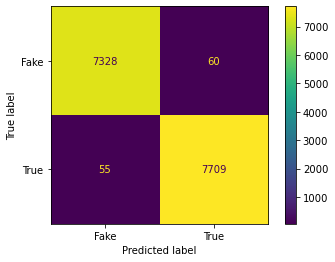

In [59]:
display(ConfusionMatrixDisplay(confusion_matrix(y_pred=pred_data_lstm,y_true=y_test), display_labels=['Fake', 'True']).plot())

### Creating classification_report for LSTM Model

In [60]:
print(classification_report(y_pred=pred_data_lstm,y_true=y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7388
           1       0.99      0.99      0.99      7764

    accuracy                           0.99     15152
   macro avg       0.99      0.99      0.99     15152
weighted avg       0.99      0.99      0.99     15152



## GRU (Gated recurrent unit) Model

### Setting the model parameters 

In [61]:
embed_dim = 50
gru_out = 64
batch_size = 32

### Building the GRU-Model

In [62]:
model_gru = Sequential()
#
model_gru.add(Embedding(max_words, embed_dim,input_length = max_len))
#
model_gru.add(Bidirectional(GRU(gru_out)))
#
model_gru.add(Dense(256))
#
model_gru.add(Activation('relu'))
#
model_gru.add(Dropout(0.5))
#
model_gru.add(Dense(1, name= "out_layer"))
#
model_gru.add(Activation('sigmoid'))
#
#
model_gru.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_gru.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 50)           200000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              44544     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257       
                                                      

### Training the GRU-Model

In [76]:
history_gru=model_gru.fit(train_sequences_padded, y_train, batch_size=batch_size, epochs = 2, validation_split=0.2)

Epoch 1/2
1137/1137 [==============================] - 264s 232ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0208 - val_accuracy: 0.9949
Epoch 2/2
1137/1137 [==============================] - 286s 252ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0164 - val_accuracy: 0.9968


### Evaluating the GRU- Model on test dataset (compare to test values)

In [77]:
evaluation_gru=model_gru.evaluate(test_sequences_padded, y_test)

474/474 [==============================] - 17s 37ms/step - loss: 0.0198 - accuracy: 0.9960


# Building plots to summarize history of GRU- MODEL trainig process

### GRU Model  'Training' and 'Validation' Accuracy

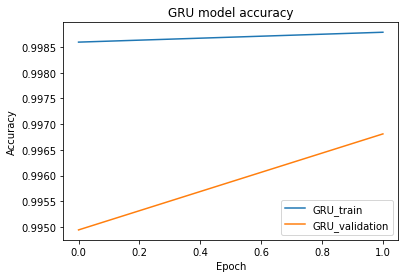

In [78]:
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('GRU model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['GRU_train', 'GRU_validation'], loc='lower right')
plt.show()

### GRU Model  'Training' and 'Validation' Loss

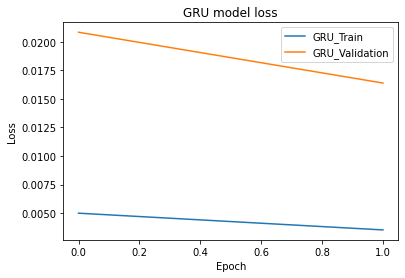

In [79]:
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['GRU_Train', 'GRU_Validation'], loc = 'upper right')

### Saving the Predicted Data for GRU

In [80]:
pred_data_2=model_gru.predict(test_sequences_padded)

In [81]:
pred_data_gru=pred_data_2.copy()

### Rounding the data (1 or 0 ) to classify

In [82]:
for data in range (len(pred_data_gru)):
    pred_data_gru[data][0] = round (pred_data_gru[data][0])

### Creating confusion matrix and inserting the predictions and the expected values

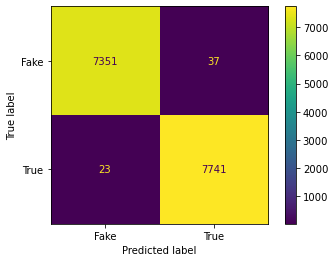

In [83]:
display(ConfusionMatrixDisplay(confusion_matrix(y_pred=pred_data_gru,y_true=y_test), display_labels=['Fake', 'True']).plot())

### Creating classification_report for GRU Model

In [84]:
print(classification_report(y_pred=pred_data_gru,y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7388
           1       1.00      1.00      1.00      7764

    accuracy                           1.00     15152
   macro avg       1.00      1.00      1.00     15152
weighted avg       1.00      1.00      1.00     15152



# Saving the models , in order to use them elsewhere

In [85]:
import pickle 

### Tokeniser

In [86]:
pickle.dump(token, open('Tokeniser.pkl', 'wb'))

### LSTM model

In [87]:
pickle.dump(model_lstm, open('LSTM_MODEL.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://e5a642b8-ff2a-4f61-98a8-c1e5e01f7051/assets


INFO:tensorflow:Assets written to: ram://e5a642b8-ff2a-4f61-98a8-c1e5e01f7051/assets


### GRU model

In [88]:
pickle.dump(model_gru, open('GRU_MODEL.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://d3a25c68-77b5-40bd-b0ba-169c7254b7d1/assets


INFO:tensorflow:Assets written to: ram://d3a25c68-77b5-40bd-b0ba-169c7254b7d1/assets
